In [10]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

from model import *
from view import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
fs = 625e6
duration = 48e-6
F_main_real=440e3

t = np.linspace(0, duration, int(duration * fs))  
U = np.sin(2 * np.pi * F_main_real * t)

In [12]:
R= 10
C= 475e-12

t,I= RC_transfer(t,U,R,C)

439936.31535947707


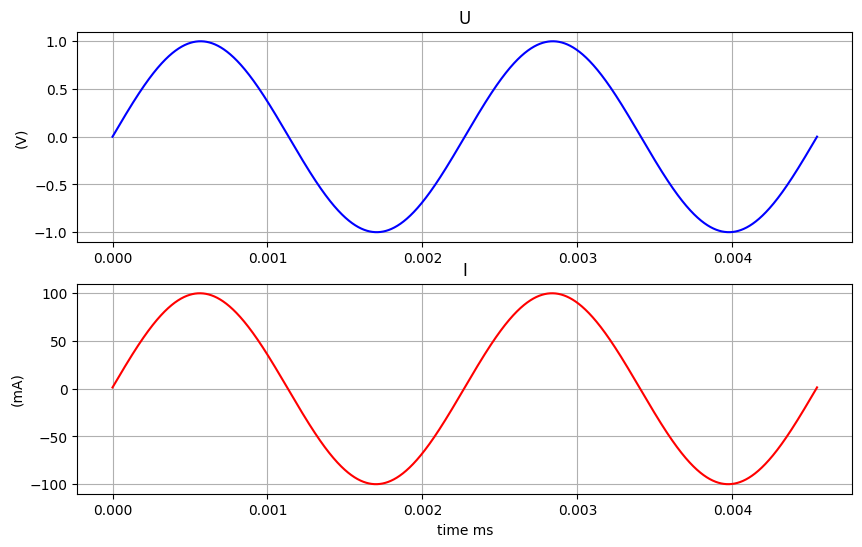

In [22]:
F,V = get_spectrum3([t,U])

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=convert_to_counts(t,T)

window=T_counts*2

show_I_U(t,I,U,0,window)

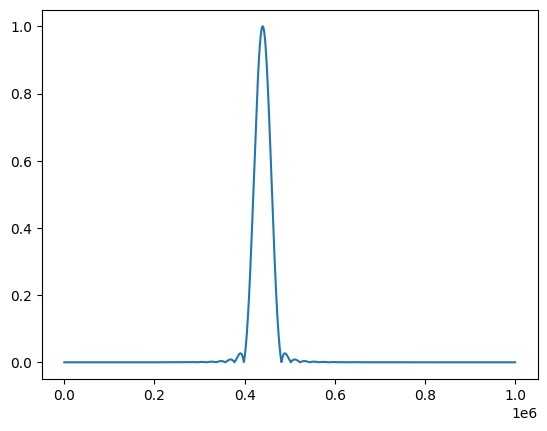

In [14]:
plt.plot(F,V)

np.float64(0.7522831587176158)

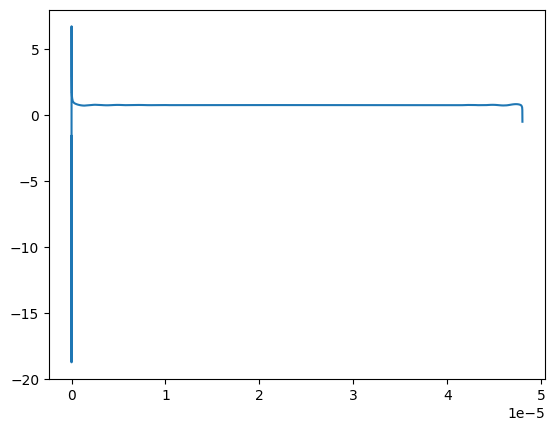

In [15]:
time_hilbert, phase_hilbert=get_phase_hilbert(t, U, I)

plt.plot(time_hilbert, phase_hilbert)

phase_mean=abs(np.mean(phase_hilbert))

central_index=int(len(phase_hilbert)/2)
phase_mean=phase_hilbert[central_index]
phase_mean

In [16]:
# Сравнение частоты 

f_rel_real=1/(2*pi*R*C)
f_rel_real

33506303.808820073

In [17]:
f_rel_calc_mean = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
print(f_rel_calc_mean)

33504717.665683296


In [18]:
phase_diff = np.array(phase_diff)  # гарантируем, что это массив
f_graph = F_peak_calc * np.cos(phase_diff*0.0174533) / np.sin(phase_diff*0.0174533)

plt.plot(t,f_graph)

np.mean(f_graph)

NameError: name 'phase_diff' is not defined